In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
df=pd.read_csv("/content/car data.csv")
print(df.head())
print()
print(df.tail())
print()
print(df.shape)
print()
print(df.info())
print()
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5

In [24]:
# Define target
target = "Selling_Price"

# Drop irrelevant columns if present
drop_cols = []

# Drop Car_Name if exists
if "Car_Name" in df.columns:
    drop_cols.append("Car_Name")

# Convert Year -> Age if exists
import datetime
if "Year" in df.columns:
    current_year = datetime.datetime.now().year
    df["Car_Age"] = current_year - df["Year"]
    drop_cols.append("Year")  # drop raw Year

# Drop Owner
if "Owner" in df.columns:
    drop_cols.append("Owner")

# Apply drops
df = df.drop(columns=drop_cols, errors="ignore")

# Separate features & target
X = df.drop(columns=[target])
y = df[target]

print("Dropped columns:", drop_cols)
print("Features:", X.columns.tolist())
print("Target:", target)

Dropped columns: ['Car_Name', 'Year', 'Owner']
Features: ['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Car_Age']
Target: Selling_Price


In [25]:
print(df.head())

   Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0           3.35           5.59       27000    Petrol       Dealer   
1           4.75           9.54       43000    Diesel       Dealer   
2           7.25           9.85        6900    Petrol       Dealer   
3           2.85           4.15        5200    Petrol       Dealer   
4           4.60           6.87       42450    Diesel       Dealer   

  Transmission  Car_Age  
0       Manual       11  
1       Manual       12  
2       Manual        8  
3       Manual       14  
4       Manual       11  


In [26]:

for col in df.columns:  #Values counts of my data
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for Selling_Price:
Selling_Price
0.45     8
0.60     8
4.50     7
5.25     7
4.75     6
        ..
10.11    1
6.40     1
8.55     1
9.50     1
11.50    1
Name: count, Length: 156, dtype: int64


Value counts for Present_Price:
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
4.43      6
         ..
6.10      1
13.09     1
11.60     1
11.00     1
12.50     1
Name: count, Length: 148, dtype: int64


Value counts for Driven_kms:
Driven_kms
15000    9
45000    9
40000    5
25000    5
50000    5
        ..
60076    1
33988    1
87934    1
9000     1
5464     1
Name: count, Length: 206, dtype: int64


Value counts for Fuel_Type:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


Value counts for Selling_type:
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


Value counts for Transmission:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Value counts for Car_Age:
Car_Age
10    61
9     

In [27]:

# # Remove rows where Fuel_Type is CNG
# if "Fuel_Type" in df.columns:
#     df = df[df["Fuel_Type"] != "CNG"]

# print("After removing CNG rows, shape:", df.shape)

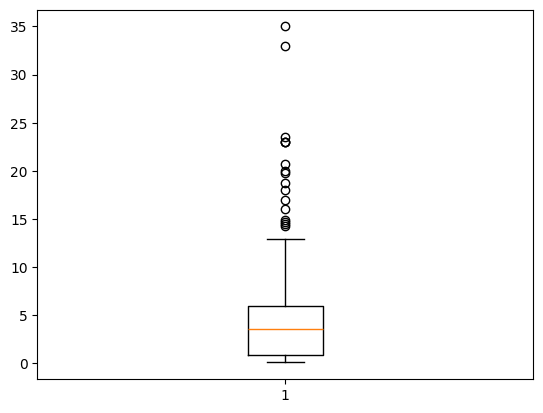

In [28]:
plt.boxplot(df['Selling_Price'])
plt.show()

In [29]:
# # IQR method
Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# # Remove outliers
data_after = df[(df['Selling_Price'] >= lower_limit) &
                         (df['Selling_Price'] <= upper_limit)]

print("Before cleaning shape:", df.shape)
print("After cleaning shape:", data_after.shape)

Before cleaning shape: (301, 7)
After cleaning shape: (284, 7)


In [30]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

categorical = ['Fuel_Type', 'Selling_type', 'Transmission']
numeric = [col for col in X.columns if col not in categorical]

In [31]:
# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('car', OneHotEncoder(drop="first"), categorical)
    ], remainder="passthrough"
)

# ML pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('car',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [33]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))

R² Score: 0.96
RMSE: 0.959


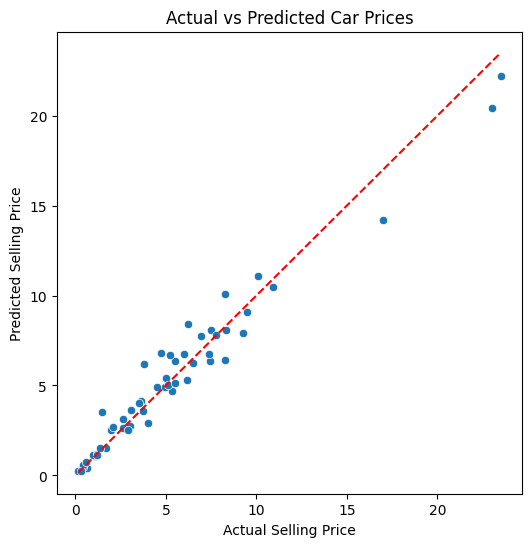

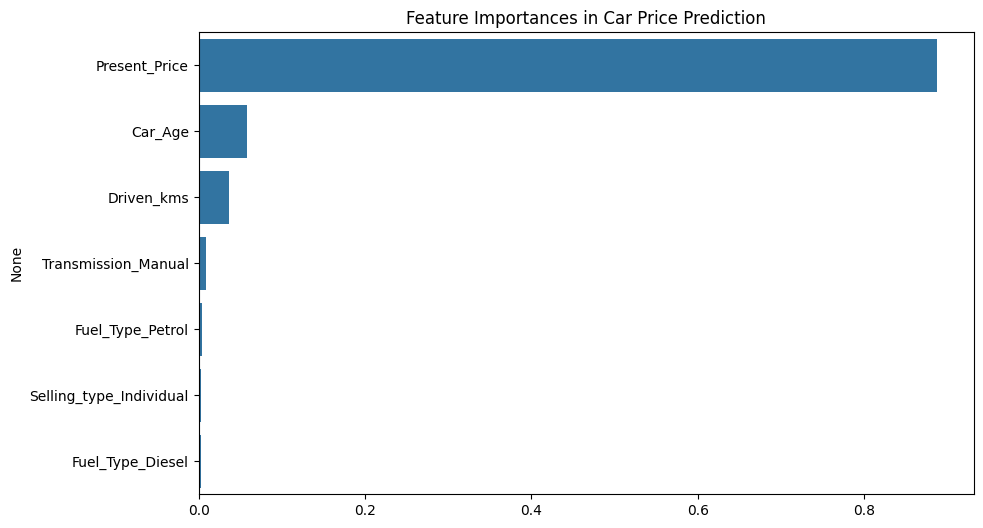

In [34]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()
# Feature Importances
rf = model.named_steps['regressor']
enc = model.named_steps['preprocessor'].named_transformers_['car']
feature_names = enc.get_feature_names_out(categorical)
all_features = list(feature_names) + numeric

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances in Car Price Prediction")
plt.show()

In [35]:
import os, joblib

# Create folder
os.makedirs("artifacts", exist_ok=True)

# Save your trained model
joblib.dump(model, "artifacts/best_xgb_model.joblib")

print("✅ Model saved successfully at 'artifacts/best_xgb_model.joblib'")


✅ Model saved successfully at 'artifacts/best_xgb_model.joblib'


In [36]:
!pip install flask pyngrok

In [41]:
from pyngrok import ngrok

# Replace with your auth token from ngrok dashboard
!ngrok authtoken "your taken"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

# Load Pretrained Model Pipeline
model_path = "artifacts/best_xgb_model.joblib"

if not os.path.exists(model_path):
    st.error("❌ Model file not found. Please save it first as 'artifacts/best_xgb_model.joblib'.")
else:
    model = joblib.load(model_path)

#  Streamlit App Configuration

st.set_page_config(page_title="Car Price Prediction", layout="centered", page_icon="🚗")

st.markdown("""
    <style>
        .title {text-align: center; color: #0078ff; font-size: 2.5em; font-weight: bold;}
        .footer {text-align: center; color: gray; margin-top: 40px;}
    </style>
""", unsafe_allow_html=True)

st.markdown('<p class="title">🚗 Car Price Prediction App</p>', unsafe_allow_html=True)
st.write("Enter car details below to predict its selling price (in lakhs).")


#  Input Fields (must match the training data)
col1, col2 = st.columns(2)

with col1:
    year = st.number_input("Year of Manufacture", min_value=1990, max_value=2025, value=2015)
    present_price = st.number_input("Present Price (in lakhs)", min_value=0.0, max_value=50.0, step=0.1, value=5.0)
    fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG"])

with col2:
    kms_driven = st.number_input("Kilometers Driven", min_value=0, max_value=500000, step=500, value=25000)
    selling_type = st.selectbox("Selling Type", ["Dealer", "Individual"])
    transmission = st.selectbox("Transmission Type", ["Manual", "Automatic"])


#  Compute Derived Feature (Car_Age)
from datetime import datetime
current_year = datetime.now().year
car_age = current_year - year


#  Prediction

if st.button("Predict Selling Price"):
    if not os.path.exists(model_path):
        st.error("⚠️ Model not found. Please ensure 'artifacts/best_xgb_model.joblib' exists.")
    else:
        try:
            # Prepare input DataFrame to match pipeline training format
            input_data = pd.DataFrame({
                "Present_Price": [present_price],
                "Driven_kms": [kms_driven],
                "Fuel_Type": [fuel_type],
                "Selling_type": [selling_type],
                "Transmission": [transmission],
                "Car_Age": [car_age]
            })

            # Predict using trained pipeline (preprocessing handled inside)
            prediction = model.predict(input_data)[0]

            st.success(f"💰 **Predicted Selling Price:** ₹{prediction:.2f} lakhs")

        except Exception as e:
            st.error(f"❌ Prediction failed: {e}")

st.markdown('<div class="footer">Developed with ❤️ using Streamlit + RandomForest</div>', unsafe_allow_html=True)


Overwriting app.py


In [43]:
!pip install streamlit pyngrok joblib


In [44]:
!pip install streamlit pyngrok joblib
from pyngrok import ngrok
import subprocess, time

ngrok.kill()
process = subprocess.Popen(["streamlit", "run", "app.py"])
time.sleep(8)
public_url = ngrok.connect(8501)
print("🌍 Streamlit App is Live at:", public_url)


🌍 Streamlit App is Live at: NgrokTunnel: "https://uninclining-lyle-sirenically.ngrok-free.dev" -> "http://localhost:8501"
